# ФОМП. Лабораторні роботи
_Виконав студент групи ФМ-71мп_

_Богомаз Р._

## Дислокаційна субструктура

### Завдання
1. По електронно-мікроскопічним зображенням дислокаційної субструктури &alpha;-заліза оцінити скалярну густину дислокацій.
2. Розрахувати вклад від дислокаційної субструктури в границю текучості &alpha;-заліза.

### Виконання

Знаходимо скалярну густину дислокації $\langle\rho\rangle$ таким чином:
1. На зображенні структури матеріалу наносимо сітку ліній з кроком 1 см.
2. Рахуємо число перетинів дислокацій з лініями сітки: $N_1$ - з горизонтальними, $N_2$ - з вертикальними лініями.
3. Розраховуємо скалярну густину дислокацій за формулою:

$$ \langle\rho\rangle = \frac{M}{t} \left(\frac{N_1}{L_1} + \frac{N_2}{L_2}\right),$$

де $M$ - збільшення фотографії; $t$ - товщина фольги (200 нм); $L_1$ і $L_2$ - сумарна довжина горизонтальних та вертикальних ліній сітки.

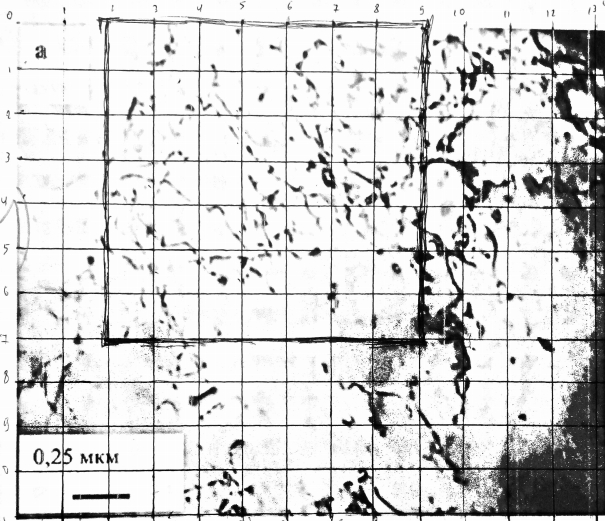

In [6]:
from IPython.display import Image
Image('lab_2.jpg')

Рахуємо кількості перетинів $N_1$ та $N_2$, та довжини ліній сітки $L_1$ та $L_2$:

In [17]:
N1, N2 = 35, 44
L1, L2 = 6*7e-2, 6*7e-2
f'L1 = {L1:.2f} м; L2 = {L2:.2f} м.'

'L1 = 0.42 м; L2 = 0.42 м.'

Збільшення $M$ становить:

In [45]:
M = int(1.2e-2 / 0.25e-4)
f'M = {M}'

'M = 480'

Розраховуємо скалярну густину дислокацій:

In [48]:
def average_dislocation_density(M=M, t=200e-9, N1=N1, N2=N2, L1=L1, L2=L2):
    return (M / t) * (N1/L1 + N2/L2)
f'{average_dislocation_density()*1e-2:.2e} 1/cм'

'4.51e+09 1/cм'

## Взаємодія дислокацій з поверхнею

**Завдання**: Розрахувати силу взаємодії дислокації з поверхнею. Вказати напрямок
руху дислокації та можливість переходу в матеріал покриття. Матриця – ваш номер
бригади. Покриття – матеріал наступного варіанту. Всі необхідні дані наведено в
таблиці.

### Вихідні дані

|варіант|метал|Тип ґратки|Параметр ґратки, нм|Модуль зсуву, ГПа|Коеф. Пуссона|Вектор Б дислокації|Товщина покриття, мкм|Відстань від поверхні $L=Nа$, нм $N$, разів|
|-|-|-|-|-|-|-|-|-|
|1|$Fe_{\alpha}$|ОЦК|0.287|82.5|0.29|$\frac{a}{2}[111]$|120|100|
|2|$Cu$|ГЦК|0.36|45|0.33|$\frac{a}{2}[110]$|70|150|

### Виконання

Оскільки $G_{\textit{матеріал}} > G_{\textit{покриття}}$, то дислокація притягується до поверхні розподілу і може перейти у інше середовище. Розраховуємо силу взаємодії дислокації з поверхнею за формулою:
$$F = \frac{G b^2}{4\pi L}$$

In [2]:
from math import sqrt, log, pi, exp
import pandas as pd

In [5]:
def b_len(n, a, h, k, l):
    return a / n * sqrt(h**2 + k**2 + l**2)

vector_burger = b_len(2, 0.287e-9, 1, 1, 1)

def Force(G, b, L):
    return G * b**2 / (4* pi * L)
"{:.2e} Н".format(Force(82.5e9, vector_burger, 100*0.287e-9))

'1.41e-02 Н'

### Висновки

1. Дислокація на відстані 28.8 нм від поверхні розподілу буде притягуватись до неї з силою 14 мН.
2. Притягування зумовлене тим, що модуль зсуву матриці більший за модуль зсуву покриття і може перейти у середовище покриття.

## Когерентні частинки

### Практичне завдання:
1. Розрахувати критичний розмір частинки другої фази, яку може перерізати дислокація в матеріалі матриці.
2. Оцінити зміцнення від наявності когерентних частинок другої фази за механізмом Мотта-Набарро.

### Вихідні дані
|варіант|метал|Тип ґратки|Параметр ґратки, нм|Модуль зсуву, ГПа|Коеф. Пуссона|Вектор Б дислокації|Р-р частинки, нм|Коеф. розчинення атомів, ат.%|
|-|-|-|-|-|-|-|-|-|
|1|$Mn_{\alpha}$|ОЦК|0.89|76.5|0.24|$\frac{a}{2}[111]$|2.9|0.3|
|2|$Cu$|ГЦК|0.36|45|0.33|$\frac{a}{2}[110]$|3.7|0.5|

In [2]:
# _m - Mn, _b - Cu

# Модуль зсуву
G_m = 76.5e9 
G_b = 45e9

# Коеф. Пуссона
mu_m = 0.24 
mu_b = 0.33

# Вектори Б дислокації
a_m = 0.89e-9 # Параметр ґратки
n_m = 2
h_m, k_m, l_m = 1, 1, 1

a_b = 0.36e-9 # Параметр ґратки
n_b = 2
h_b, k_b, l_b = 1, 1, 0

r_b = 3.7e-9 # розмір частинки
C_b = 0.3e-2 # конц. розчин. атомів

### Виконання
#### Критичний розмір частинки другої фази
 Критичний розмір частинки другої фази, яку може перерізати дислокація в матеріалі матриці можна
розрахувати за формулою:

$$D_{\textit{кр}}=\frac{4 G_m b_m^2}{0.33\pi b_{\textit{в}} G_{\textit{в}}}$$

де $G_m$ – модуль зсуву матриці, $b_m$ – вектор Бюргерса рухомої дислокації в матриці,
$G_{\textit{в}}$ – модуль зсуву матеріалу частинки, $b_{\textit{в}}$ – вектор Бюргерса дислокації, що рухається
в частинці.

In [3]:
b_m = b_len(n_m, a_m, h_m, k_m, l_m)
b_b = b_len(n_b, a_b, h_b, k_b, l_b)

D_crit = 4 * G_m * (b_b**2) / (0.33 * pi * b_b * G_b)
"{:.2f} нм".format(D_crit*1e9)

'1.67 нм'

Критичний розмір частинки другої фази становить 1.67 нм.

#### Зміцнення від наявності когерентних частинок другої фази
При наявності в матеріалі зон Гіньє-Престона та/або когерентних часток
зміцнення розраховується за виразом, запропонованим Моттом і Набарро (дислокація не перерізає частинку):

$$\Delta\sigma = 2 G_m~\varkappa~f,$$

$$\varkappa = \frac{3K\varepsilon}{3K+2E(1+\mu)},$$

$$\varepsilon = 2 \frac{a_m-a_b}{a_b + a_m},$$

де $G_m$ – модуль зсуву матриці, $f$ – об’ємна доля частинок в матеріалі, $\varepsilon$ – параметр
невідповідності, $a_m$ та $a_b$ – параметри граток матриці і виділення, $K$ - об'ємний
модуль пружності виділення, $\mu$ - коефіцієнт Пуассона матриці.

$$K = \frac{2G(1+\mu)}{3(1-2\mu)}$$

$$E = 2G(1+\mu)$$

In [34]:
f = C_b
K = 2 * G_b * (1 + mu_m) / (3*(1-2*mu_m))
E = 2 * G_m * (1 + mu_m)
epsilon = 2 * (a_m - a_b) / (a_b + a_m)
kappa = 3 * K * epsilon / (3 * K + 2 * E * (1+ mu_m))
Dsigma = 2 * G_m * kappa * f
"{:.2f} МПа".format(Dsigma*1e-6)

'121.93 МПа'

### Висновки
1. Розмір частинки другої фази перевищує критичне значення. Отже дислокація не може перерізати таку частинку.
2. Зміцнення від наявності когерентних частинок другої фази за механізмом Мотта-Набарро становить 122 МПа. 
3. Таке значення зумовлене припущенням, що частинки є когерентними. В даному випадку таке припущення не є корректним - частинки сильно відрізняються за типом гратки та її періодом.

## Деформаційне зміцнення матеріалу некогерентними частинками другої фази
**Мета роботи:** опанувати методику визначення внеску некогерентних частинок
другої фази в деформаційне зміцнення матеріалу.

### Практичні завдання
1. Оцінити розміри частинок другої фази в залізі та середню відстань між ними, користуючись фото структури. Окремий варіант для кожної бригади
2. Розрахувати додаткове зміцнення когерентними частинками за формулою (2).
3. Розрахувати додаткове зміцнення когерентними частинками за формулою (3).
4. Порівняти отримані результати.

### Вихідні дані

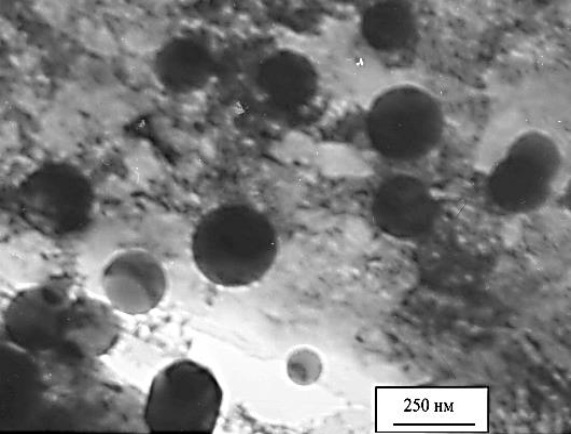

In [5]:
Image(r"lab_5_1.jpg")

### Виконання

Оцінюємо розміри частинок другої фази та середню відстань між ними. Використовуємо программний додаток _Image Fiji_.

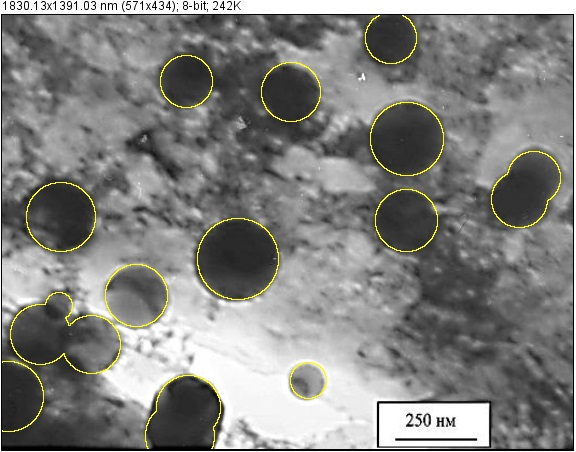

In [6]:
Image(r"lab_5_2.jpg")

In [7]:
df_part = pd.read_csv("lab_5_particle_diameter.csv", index_col=False)[[' ', 'Length']]
df_part['r'] = df_part.Length/2*1e-9 # дані в м
df_part

,,Length,r
0,1,215.341,1.076705e-07
1,2,184.065,9.203250e-08
2,3,162.737,8.136850e-08
3,4,182.720,9.136000e-08
4,5,106.976,5.348800e-08
5,6,254.419,1.272095e-07
6,7,221.316,1.106580e-07
7,8,170.144,8.507200e-08
8,9,164.245,8.212250e-08
9,10,139.045,6.952250e-08


Шукаємо середній радіус:

In [8]:
r = df_part['r'].mean()
"{:.2f} нм".format(r*1e9)

'90.45 нм'

Середню відстань розраховуємо за формулою:

$$L = r \sqrt{\frac{4\pi}{3 f}},$$

де $r$ - радіус частинки, $f$ - об'ємна частка другої фази, яку розраховуємо за формулою:

$$f = \frac{2 D f_0}{2 D + 3 t_0},$$

де $f_0$ - доля площі фотознімку, яка зайнята проекціями частинок, $t_0$ – товщина
фольги, 200 нм.

In [9]:
sq = pd.read_csv("lab_5_squares.csv")['Area']
sq.index = ['Площа частинок на знімку, нм', 'Площа фотознімку, нм']
sq

Площа частинок на знімку, нм     454059.829
Площа фотознімку, нм            2545755.260
Name: Area, dtype: float64

Таким чином розраховуємо $f_0$ як відношення площа частинок на знімку до площі фотознімку:

In [10]:
f_0 = sq[0]/sq[1]
'{:.2f} %'.format(f_0*100)

'17.84 %'

In [11]:
D = 2 * r
t_0 = 200e-9
f = 2 * D * f_0 / (2 * D + 3 * t_0)

L = (r) * sqrt(4*pi/(3*f))

'{:.4f} нм'.format(L*1e9)

'714.6759 нм'

Розраховуємо сумарне зміцнення матеріалу внаслідок наявності некогерентних частинок за формулою:

$$\Delta \sigma_{\textit{нч}} = M \frac{m G_m b}{2 \pi (\left|\lambda-D\right|)}\Phi~ln\left(\left|\frac{\lambda-D}{4 b}\right|\right)$$

де $M$ – параметр, що враховує нерівномірність розподілу частинок в матриці
(зазвичай 0.81…0.85), $m$ – орієнтаційний множник (для ОЦК матеріалів 2.75), $G_m$ –
модуль зсуву матриці, $b$ – вектор Бюргерса рухомої дислокації, $\Phi$ – параметр
рухомої дислокації ($1$ для гвинтової та $(1-\mu)^{-1}$ для крайової), $\lambda$ – відстань між
найближчими некогерентними частинками, $D$ – середній розмір частинки.

Для заліза: $G$ = 82,5 ГПа; $µ$ = 0,29; $а$ = 0,287 нм; $b$ = 0,248 нм.

In [12]:
def sigma_nc_1(M = 0.85, m=2.75, G_m=82.5e9, mu=0.29, a=0.287e-9, b=0.248e-9, D=D, lambd=L):
    Phi = 1/(1-mu)
    return M * (m * G_m * b)/(2 * pi *(abs(lambd - D))) * Phi * log(abs((lambd - D)/(4*b)))
"{:.2f} МПа".format(sigma_nc_1()*1e-6)

'126.29 МПа'

Згідно теорії Орована, зміцнення внаслідок наявності частинок другої фази
можна розрахувати за формулою:

$$ \Delta\sigma_{\textit{нч}} = 0.25 \left(1+\frac{1}{1-\mu}\right) \frac{G_m b}{\pi L}~ ln\left(\frac{L}{2 b}\right) $$

де $L$ – середня відстань між дисперсійними частками.

In [13]:
def sigma_nc_2(G_m=82.5e9, mu=0.29, b=0.248e-9, D=D, L=L):
    return 0.25*(1+1/(1-mu))*G_m*b/(pi*L)*log(L/(2*b))
"{:.2f} МПа".format(sigma_nc_2() * 1e-6)

'39.91 МПа'

### Висновки

Зернограничне зміцнення розраховане за формулами 1 і 2 становить:
1. 126.29 МПа
2. 39.91 МПа

Зміцнення за першою формулою розраховується з урахуванням нерівномірністі розподілу частинок в матриці, друга - за середньою відстанню між частинками. Якщо частинки розподілені нерівномірно, то відповідно дисперсія відстаней буде високою, отже виходячи з цього для даного знімку доцільніше використовувати формулу 1.

## Зміцнення сплаву в результаті утворення твердого розчину

**Мета роботи**: 
- ознайомитись з механізмами зміцнення матеріалу при утворенні твердого розчину
- провести оцінку величини зміцнення загартованої конструкційної сталі в результаті формування твердих розчинів.

### Порядок роботи
1. Знаючи марку сталі визначити її хімічний склад.
2. Для кожного легуючого елементу вказаної сталі знайти значення коефіцієнту $k_i$
3. Провести оцінки величини вкладу твердорозчинного зміцнення в границю текучості сталі.

**Матеріал**: 20ХН4ФА

### Виконання
Знаходимо хімічний склад та відповідні значення коефіцієнту $k_i$ для кожного з легуючих елементів.

| Легуючий елемент | C            | Si           | Mn           | Ni           | S         | P         | Cr         | V           | Cu     |
|------------------|--------------|--------------|--------------|--------------|-----------|-----------|------------|-------------|--------|
| Вміст            | 0.17 - 0.24  | 0.17 - 0.37  | 0.25 - 0.55  | 3.75 - 4.15  | до 0.025  | до 0.025  | 0.7 - 1.1  | 0.1 - 0.18  | до 0.3 |
| Коеф. $k_i$      | 467          | 8.6          | 3.3          | 3.0          |           | 69.0      | 3.1        | 0.3         | 3.9    |

Вклад твердорозчинного зміцнення в границю текучості сталі розраховується за формулою:
$$\Delta \sigma_{\textit{т.р.}} = \sum^n_{i=1} k_i C_i, $$
де $k_i$ - коефіцієнт зміцнення &alpha;-заліза при легуванні будь-яким елементов в кількості 1% (по масі), кгс/мм<sup>2</sup>; $C_i$ - концентрація елемента, який розчинений в &alpha;-залізі, %.

In [14]:
df = pd.DataFrame([[0.24, 467],
                   [0.37, 8.6],
                   [.55, 3.3],
                   [4.15, 3.0],
                   [0.025, 0.0],
                   [0.025, 69.0],
                   [1.1, 3.1],
                   [.18, .3],
                   [.3, 3.9]], index=['C', 'Si', 'Mn', 'Ni', 'S', 'P', 'Cr', 'V', 'Cu'],
                 columns=['composition', 'k_i'])
df['sigma'] = df['composition'] * df.k_i /100 / 1.01971621297793E-07*1e-6
df

,composition,k_i,sigma
C,0.240,467.0,10.991293
Si,0.370,8.6,0.312048
Mn,0.550,3.3,0.177991
Ni,4.150,3.0,1.220928
S,0.025,0.0,0.000000
P,0.025,69.0,0.169165
Cr,1.100,3.1,0.334407
V,0.180,0.3,0.005296
Cu,0.300,3.9,0.114738


In [15]:
sigma_tr = df.sigma.sum()
'{:.2f} МПа'.format(sigma_tr)

'13.33 МПа'

Границя текучості для даної сталі становить 685 МПа. Частка зміцнення становить від цього значення:

In [16]:
'{:.2f} %'.format(sigma_tr / 685 * 100)

'1.95 %'

### Висновки
1. Ознайомились з механізмами зміцнення матеріалу при утворенні твердого розчину та провели оцінку твердорозчинного зміцнення для сталі 20ХН4ФА.
2. Твердорозчинне зміцнення для даного матеріалу становить 2% від його границі текучості.
3. Найбільший вклад у зміцнення дає вміст вуглецю.

## Мікромеханізми зернограничного зміцнення

**Мета роботи:** опанувати методику розрахунку зернограничного
деформаційного зміцнення полікристалічних матеріалів.

### Практичне завдання
1. Розрахувати додаткове зернограничне зміцнення в полікристалічному матеріалі. Необхідні параметри наведено в таблиці

|варіант|метал|Тип ґратки|Параметр ґратки, нм|Модуль зсуву, ГПа|Коеф. Пуссона|Дислокація|Р-р зерна, мкм|Усереднений фактор орієнтації, $\Delta m$|
|-|-|-|-|-|-|-|-|-|
|1|$Fe_{\alpha}$|ОЦК|0.287|82.5|0.29|$\frac{a}{2}[111]$|170|0.48|


Розрахувати додаткове деформаційне зміцнення полікристалу можна за
допомогою виразу:

$$ \Delta \sigma_{\textit{зг}} = 3 M~\Delta m~\tau_0\sqrt{\frac{r_0}{D}}, $$

де $M$– орієнтаційний фактор Тейлора (для ГЦК гратки – 3,1; для ОЦК гратки –
2,0); $\Delta m$ – усереднений фактор орієнтації (може змінюватися від 0 до 0,5); $\tau_0$ –
критичне дотичне напруження для монокристалів; $r_0$ – деяка константа, що має
розмірність довжини, становить 2-4 мкм; $D$ – розмір зерна.

Критичне дотичне напруження руху
дислокації визначається виразом Паєрлса-Набарро:

$$ \tau_0 = \tau_{\textit{ПН}} = \frac{2 G}{1 - \mu} exp{\frac{-2\pi a}{b (1- \mu)}}$$

де $G$ - модуль зсуву; $\mu$- коефіцієнт Пуассона, $a$ - параметр гратки, $b$ – вектор
Бюргерса. Для заліза: $G$ = 82,5 ГПа; $µ$ = 0,29; $а$ = 0,287 нм; $b$ = 0,248 нм.

In [17]:
def tau_PN(G_m=82.5e9, mu=0.29, a=0.287e-9, b=0.248e-9):
    return 2*G_m/(1-mu)*exp(-2*pi*a/(b*(1-mu)))

def sigma_zg(M=2.0, Deltam=0.48, tau_0=tau_PN(), D=170e-6, r_0=3e-6):
    return 3 * M * Deltam * tau_0 * sqrt(r_0/D)

"{:.2f} МПа".format(sigma_zg()*1e-6)

'3.17 МПа'

### Висновки
Зернограничне зміцнення становить 3.17 МПа